In [27]:
import requests

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
from datetime import datetime

I use USAJobs API to gather data.

In [30]:
base_url = "https://data.usajobs.gov/api/search"
api_key = "C9XHxoZhqCTTlD2L6sYuYuS3r4FQCvjUP+/7Gt8QrwI="
headers = {
    "Authorization-Key": api_key,
    "User-Agent": "yan.xia@colorado.edu"
}

# Parameters for pagination
results_per_page = 100  
start_record = 1 
max_records = 10000
jobs_data = []

In [31]:
# Loop to gather data with pagination
while start_record <= max_records:
    params = {
        "ResultsPerPage": results_per_page,
        "StartRecord": start_record
    }
    response = requests.get(base_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        job_listings = data.get('SearchResult', {}).get('SearchResultItems', [])
        
        if not job_listings:
            break
        
        # Normalize and append raw job listings
        df_raw_jobs = pd.json_normalize(job_listings)
        jobs_data.append(df_raw_jobs)
        
        start_record += results_per_page
    else:
        print("Failed to retrieve data. Status code:", response.status_code)
        break

# Concatenate all collected pages into a single DataFrame
df_raw_jobs = pd.concat(jobs_data, ignore_index=True)

After I got the raw data, I need to take a look at the shape.

In [32]:
df_raw_jobs.shape

(10000, 70)

In [33]:
print("Raw dataset columns:")
print(df_raw_jobs.columns)

Raw dataset columns:
Index(['MatchedObjectId', 'RelevanceRank',
       'MatchedObjectDescriptor.PositionID',
       'MatchedObjectDescriptor.PositionTitle',
       'MatchedObjectDescriptor.PositionURI',
       'MatchedObjectDescriptor.ApplyURI',
       'MatchedObjectDescriptor.PositionLocationDisplay',
       'MatchedObjectDescriptor.PositionLocation',
       'MatchedObjectDescriptor.OrganizationName',
       'MatchedObjectDescriptor.DepartmentName',
       'MatchedObjectDescriptor.JobCategory',
       'MatchedObjectDescriptor.JobGrade',
       'MatchedObjectDescriptor.PositionSchedule',
       'MatchedObjectDescriptor.PositionOfferingType',
       'MatchedObjectDescriptor.QualificationSummary',
       'MatchedObjectDescriptor.PositionRemuneration',
       'MatchedObjectDescriptor.PositionStartDate',
       'MatchedObjectDescriptor.PositionEndDate',
       'MatchedObjectDescriptor.PublicationStartDate',
       'MatchedObjectDescriptor.ApplicationCloseDate',
       'MatchedObjectDescrip

In [34]:
print(df_raw_jobs.head())

  MatchedObjectId  RelevanceRank MatchedObjectDescriptor.PositionID  \
0       451842500              0                            OARMAV1   
1       534684000              0                 DE-10497103-24-JDA   
2       536458000              0                  DE-10526502-19-DF   
3       547366900              0              AGL-ERR-20-2101-63651   
4       593253000              0                              24-23   

               MatchedObjectDescriptor.PositionTitle  \
0      Attorney and Assistant United States Attorney   
1                                          ARCHITECT   
2                                           Attorney   
3  Technical Operations (AJW) Airway Transportati...   
4                                            Counsel   

                 MatchedObjectDescriptor.PositionURI  \
0  https://www.usajobs.gov:443/GetJob/ViewDetails...   
1  https://www.usajobs.gov:443/GetJob/ViewDetails...   
2  https://www.usajobs.gov:443/GetJob/ViewDetails...   
3  https://w

In [35]:
print(df_raw_jobs.columns)

Index(['MatchedObjectId', 'RelevanceRank',
       'MatchedObjectDescriptor.PositionID',
       'MatchedObjectDescriptor.PositionTitle',
       'MatchedObjectDescriptor.PositionURI',
       'MatchedObjectDescriptor.ApplyURI',
       'MatchedObjectDescriptor.PositionLocationDisplay',
       'MatchedObjectDescriptor.PositionLocation',
       'MatchedObjectDescriptor.OrganizationName',
       'MatchedObjectDescriptor.DepartmentName',
       'MatchedObjectDescriptor.JobCategory',
       'MatchedObjectDescriptor.JobGrade',
       'MatchedObjectDescriptor.PositionSchedule',
       'MatchedObjectDescriptor.PositionOfferingType',
       'MatchedObjectDescriptor.QualificationSummary',
       'MatchedObjectDescriptor.PositionRemuneration',
       'MatchedObjectDescriptor.PositionStartDate',
       'MatchedObjectDescriptor.PositionEndDate',
       'MatchedObjectDescriptor.PublicationStartDate',
       'MatchedObjectDescriptor.ApplicationCloseDate',
       'MatchedObjectDescriptor.PositionFormatted

In [36]:
print("Raw dataset sample:")
print(df_raw_jobs.head())

Raw dataset sample:
  MatchedObjectId  RelevanceRank MatchedObjectDescriptor.PositionID  \
0       451842500              0                            OARMAV1   
1       534684000              0                 DE-10497103-24-JDA   
2       536458000              0                  DE-10526502-19-DF   
3       547366900              0              AGL-ERR-20-2101-63651   
4       593253000              0                              24-23   

               MatchedObjectDescriptor.PositionTitle  \
0      Attorney and Assistant United States Attorney   
1                                          ARCHITECT   
2                                           Attorney   
3  Technical Operations (AJW) Airway Transportati...   
4                                            Counsel   

                 MatchedObjectDescriptor.PositionURI  \
0  https://www.usajobs.gov:443/GetJob/ViewDetails...   
1  https://www.usajobs.gov:443/GetJob/ViewDetails...   
2  https://www.usajobs.gov:443/GetJob/ViewDetail

These are the columns I am interested in and useful for my research topic.

In [37]:
selected_columns = [
    'MatchedObjectDescriptor.PositionRemuneration',
    'MatchedObjectDescriptor.PositionLocation',
    'MatchedObjectDescriptor.JobCategory',
    'MatchedObjectDescriptor.PublicationStartDate',
    'MatchedObjectDescriptor.ApplicationCloseDate',
    'MatchedObjectDescriptor.UserArea.Details.JobSummary'
]

df_selected = df_raw_jobs[selected_columns]

# Display the selected columns
print("Selected dataset columns:")
print(df_selected.head())

Selected dataset columns:
        MatchedObjectDescriptor.PositionRemuneration  \
0  [{'MinimumRange': '59319.0', 'MaximumRange': '...   
1  [{'MinimumRange': '120246.0', 'MaximumRange': ...   
2  [{'MinimumRange': '64649.0', 'MaximumRange': '...   
3  [{'MinimumRange': '38560.0', 'MaximumRange': '...   
4  [{'MinimumRange': '100000.0', 'MaximumRange': ...   

            MatchedObjectDescriptor.PositionLocation  \
0  [{'LocationName': 'Washington, District of Col...   
1  [{'LocationName': 'China Lake, California', 'C...   
2  [{'LocationName': 'Salt Lake City, Utah', 'Cou...   
3  [{'LocationName': 'Saint Croix, Virgin Islands...   
4  [{'LocationName': 'Washington, District of Col...   

                 MatchedObjectDescriptor.JobCategory  \
0             [{'Name': 'Attorney', 'Code': '0905'}]   
1         [{'Name': 'Architecture', 'Code': '0808'}]   
2             [{'Name': 'Attorney', 'Code': '0905'}]   
3  [{'Name': 'Transportation Specialist', 'Code':...   
4             [{'Nam

I remove some irrelevent columns and then use keywords to get the job list of disabilities, create a vacancy duration column and salary min and max columns by calculating. Finally, I got the cleaned dataset.

In [38]:
jobs_data = []

for _, row in df_selected.iterrows():
    job_info = row['MatchedObjectDescriptor.UserArea.Details.JobSummary']
    
    # Check for mentions of disabilities in the job summary
    disability_keywords = ['disability', 'accommodation', 'accessible', 'equal opportunity', 'reasonable accommodation']
    disability_mention = any(keyword in str(job_info).lower() for keyword in disability_keywords)
    
    # Extract salary information
    remuneration_info = row['MatchedObjectDescriptor.PositionRemuneration']
    if isinstance(remuneration_info, list) and len(remuneration_info) > 0:
        salary_min = remuneration_info[0].get('MinimumRange', None)
        salary_max = remuneration_info[0].get('MaximumRange', None)
    else:
        salary_min = None
        salary_max = None

    # Extract dates
    date_posted = row['MatchedObjectDescriptor.PublicationStartDate']
    closing_date = row['MatchedObjectDescriptor.ApplicationCloseDate']
    
    # Calculate vacancy duration in days
    if date_posted and closing_date:
        date_posted_dt = datetime.strptime(date_posted, '%Y-%m-%dT%H:%M:%S.%f')
        closing_date_dt = datetime.strptime(closing_date, '%Y-%m-%dT%H:%M:%S.%f')
        vacancy_duration = (closing_date_dt - date_posted_dt).days
    else:
        vacancy_duration = None  # Handle cases where dates are missing
    
    jobs_data.append({
        'SalaryMin': salary_min,
        'SalaryMax': salary_max,
        'Location': row['MatchedObjectDescriptor.PositionLocation'][0]['LocationName'] if isinstance(row['MatchedObjectDescriptor.PositionLocation'], list) else None,
        'JobCategory': row['MatchedObjectDescriptor.JobCategory'][0]['Name'] if isinstance(row['MatchedObjectDescriptor.JobCategory'], list) else None,
        'DatePosted': date_posted,
        'ClosingDate': closing_date,
        'VacancyDuration': vacancy_duration,
        'DisabilityMention': disability_mention
    })

# Convert the list of dictionaries to a DataFrame
df_jobs = pd.DataFrame(jobs_data)

# Convert DatePosted and ClosingDate to datetime for outlier detection
df_jobs['DatePosted'] = pd.to_datetime(df_jobs['DatePosted'])
df_jobs['ClosingDate'] = pd.to_datetime(df_jobs['ClosingDate'])
df_jobs['SalaryMin'] = pd.to_numeric(df_jobs['SalaryMin'], errors='coerce')
df_jobs['SalaryMax'] = pd.to_numeric(df_jobs['SalaryMax'], errors='coerce')

# Display the final dataset with the new columns
print("Final dataset with additional columns:")
print(df_jobs.head())


Final dataset with additional columns:
   SalaryMin  SalaryMax                          Location  \
0    59319.0   152771.0  Washington, District of Columbia   
1   120246.0   156323.0            China Lake, California   
2    64649.0   172500.0              Salt Lake City, Utah   
3    38560.0   123652.0       Saint Croix, Virgin Islands   
4   100000.0   145000.0  Washington, District of Columbia   

                 JobCategory              DatePosted             ClosingDate  \
0                   Attorney 2023-11-28 00:00:00.000 2024-11-27 23:59:59.997   
1               Architecture 2024-03-12 00:00:00.000 2024-12-31 23:59:59.997   
2                   Attorney 2024-05-14 15:27:05.560 2025-05-13 23:59:59.997   
3  Transportation Specialist 2024-08-18 00:00:00.000 2025-08-17 23:59:59.997   
4                   Attorney 2024-10-04 00:00:00.000 2024-10-15 23:59:59.997   

   VacancyDuration  DisabilityMention  
0              365              False  
1              294              F

In [39]:
# Find and display all rows with missing values
rows_with_missing_values = df_jobs[df_jobs.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [SalaryMin, SalaryMax, Location, JobCategory, DatePosted, ClosingDate, VacancyDuration, DisabilityMention]
Index: []


{'SalaryMinOutliers': 1       120246.0
 7       120246.0
 15      130000.0
 23      120246.0
 29      110000.0
           ...   
 9979    145000.0
 9980    145000.0
 9983    112015.0
 9984    200000.0
 9985    115587.0
 Name: SalaryMin, Length: 1200, dtype: float64,
 'SalaryMaxOutliers': 79      320000.0
 80      320000.0
 84      300000.0
 179     320000.0
 180     320000.0
           ...   
 9880    320000.0
 9884    300000.0
 9979    320000.0
 9980    320000.0
 9984    300000.0
 Name: SalaryMax, Length: 300, dtype: float64}

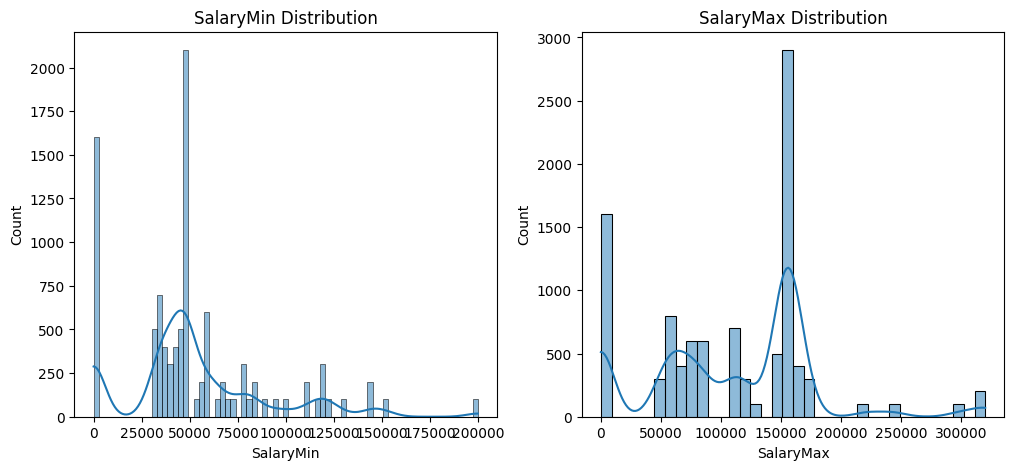

In [40]:

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers in SalaryMin and SalaryMax
salary_min_outliers = detect_outliers(df_jobs['SalaryMin'])
salary_max_outliers = detect_outliers(df_jobs['SalaryMax'])



# Visualizations of distributions
plt.figure(figsize=(12, 5))

# SalaryMin distribution
plt.subplot(1, 2, 1)
sns.histplot(df_jobs['SalaryMin'], kde=True)
plt.title('SalaryMin Distribution')

# SalaryMax distribution
plt.subplot(1, 2, 2)
sns.histplot(df_jobs['SalaryMax'], kde=True)
plt.title('SalaryMax Distribution')


# Display outliers
{
    'SalaryMinOutliers': salary_min_outliers,
    'SalaryMaxOutliers': salary_max_outliers
}


Since the dataset contains the rows that Salary min or max close to 0, I think that's because these data contains the salary per hour or week. I need to remove them. (Because of the lowest salary law, I set the salary min and shoule be bigger than 2000)

In [41]:
df_jobs['SalaryMin'] = pd.to_numeric(df_jobs['SalaryMin'], errors='coerce')
df_jobs['SalaryMax'] = pd.to_numeric(df_jobs['SalaryMax'], errors='coerce')

df_jobs_cleaned= df_jobs.dropna()
df_jobs_cleaned = df_jobs_cleaned[(df_jobs_cleaned['SalaryMin'] > 2000) & (df_jobs_cleaned['SalaryMax'] > 2000)]

In [42]:
df_jobs_cleaned.shape

(8400, 8)

Text(0.5, 1.0, 'SalaryMax Distribution (No Outliers)')

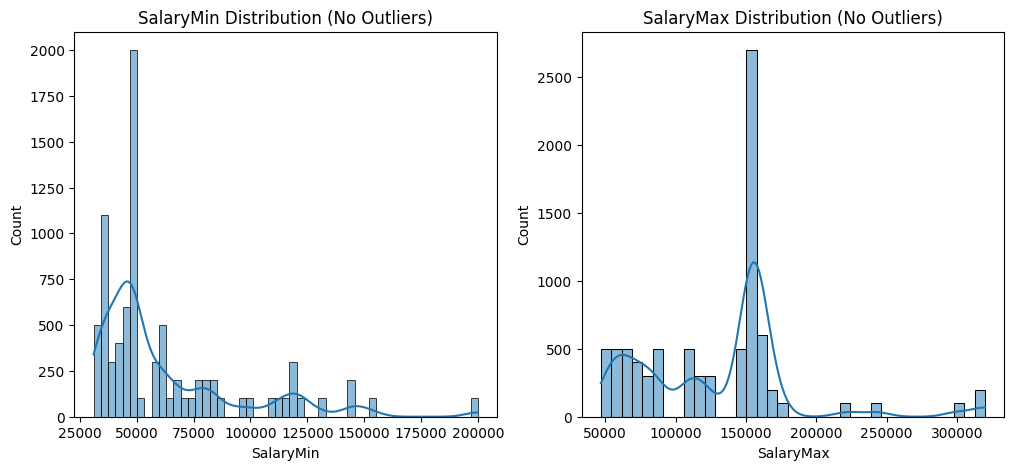

In [43]:
plt.figure(figsize=(12, 5))

# SalaryMin distribution
plt.subplot(1, 2, 1)
sns.histplot(df_jobs_cleaned['SalaryMin'], kde=True)
plt.title('SalaryMin Distribution (No Outliers)')

# SalaryMax distribution
plt.subplot(1, 2, 2)
sns.histplot(df_jobs_cleaned['SalaryMax'], kde=True)
plt.title('SalaryMax Distribution (No Outliers)')


In [44]:
print(df_jobs_cleaned.sample(5))


      SalaryMin  SalaryMax                  Location  \
1463    78255.0   108995.0             Salem, Oregon   
9389    82830.0   107680.0  Cherokee, North Carolina   
8541    47813.0   155403.0          Belgium, Belgium   
4276    49025.0    63733.0    Sisseton, South Dakota   
9183   112015.0   163252.0     Springfield, Virginia   

                          JobCategory DatePosted             ClosingDate  \
1463                       Psychology 2024-07-02 2024-12-31 23:59:59.997   
9389                   Social Science 2023-10-20 2024-10-18 23:59:59.997   
8541           Electrical Engineering 2024-09-23 2025-09-22 23:59:59.997   
4276               Medical Technician 2024-06-10 2024-11-09 23:59:59.997   
9183  Management And Program Analysis 2024-10-01 2025-04-30 23:59:59.997   

      VacancyDuration  DisabilityMention  
1463              182              False  
9389              364              False  
8541              364              False  
4276              152             

Text(0.5, 1.0, 'Boxplot of SalaryMin')

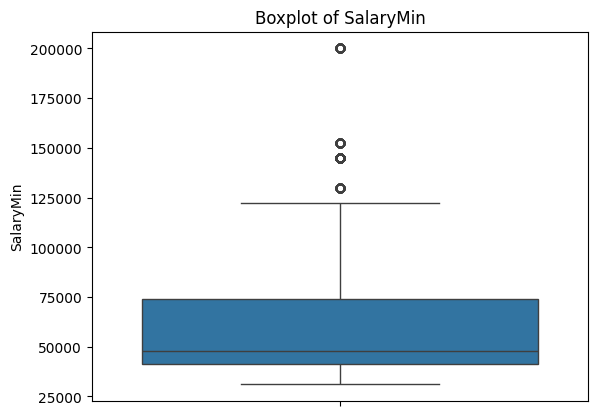

In [45]:
sns.boxplot(data=df_jobs_cleaned['SalaryMin'])
plt.title('Boxplot of SalaryMin')

Text(0.5, 1.0, 'Boxplot of SalaryMax')

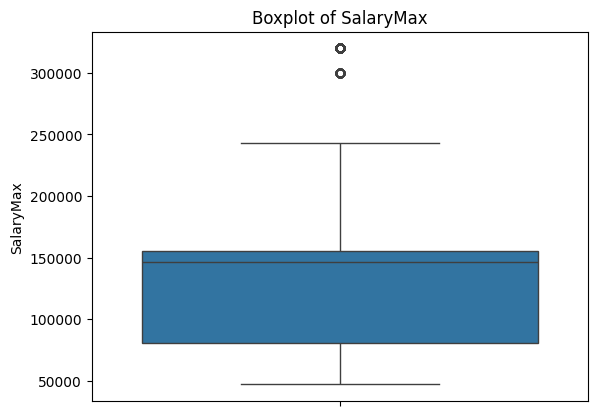

In [46]:
sns.boxplot(data=df_jobs_cleaned['SalaryMax'])
plt.title('Boxplot of SalaryMax')

Text(0.5, 1.0, 'Distribution of Vacancy Duration')

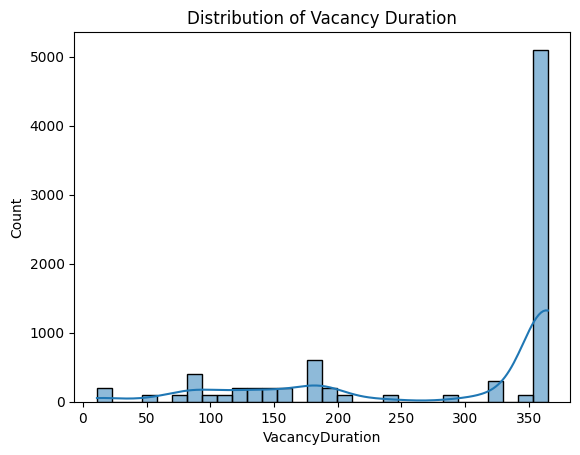

In [47]:
sns.histplot(df_jobs_cleaned['VacancyDuration'], kde=True, bins=30)
plt.title('Distribution of Vacancy Duration')


Text(0.5, 1.0, 'Boxplot of Vacancy Duration')

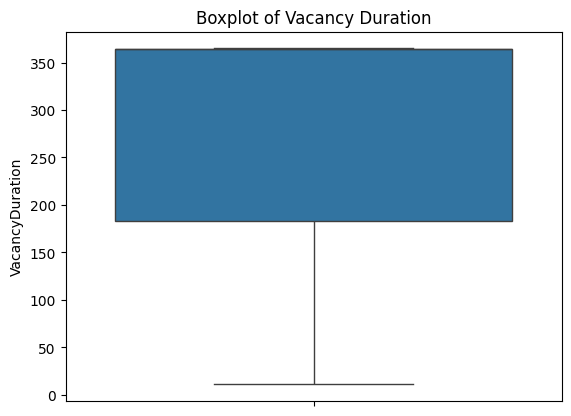

In [48]:
sns.boxplot(data=df_jobs_cleaned['VacancyDuration'])
plt.title('Boxplot of Vacancy Duration')

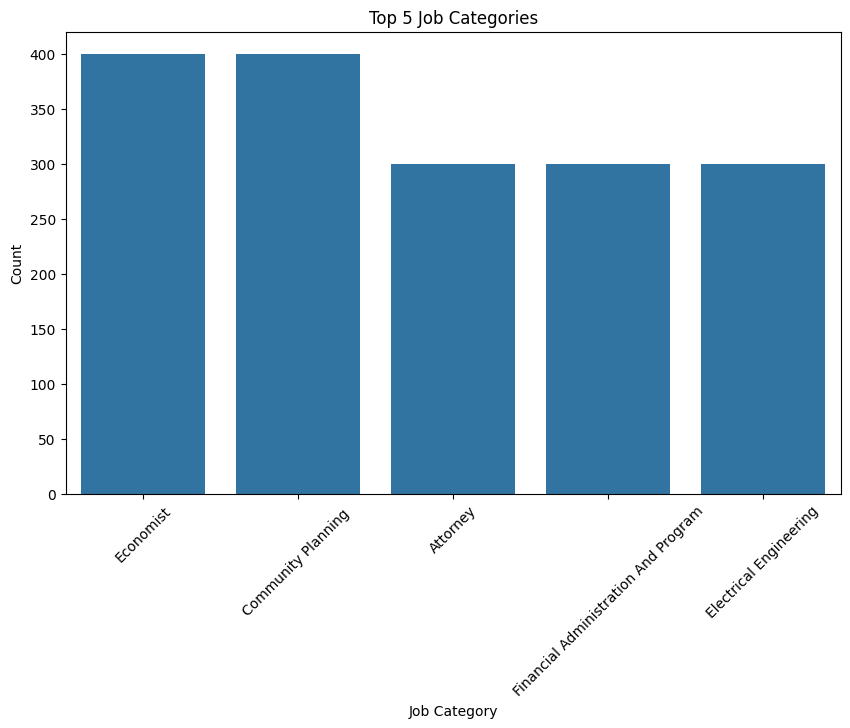

In [49]:
plt.figure(figsize=(10, 6))
top_5_categories = df_jobs_cleaned['JobCategory'].value_counts().nlargest(5)
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.xticks(rotation=45)
plt.title('Top 5 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

In [50]:
output_filename = "df_jobs_cleaned.csv"
df_jobs_cleaned.to_csv(output_filename, index=False)

print(f"DataFrame saved as {output_filename}")

DataFrame saved as df_jobs_cleaned.csv
